In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

%matplotlib inline

# train dataset

In [10]:
df_train = pd.read_csv(r'C:\Users\elkha\Downloads\house\train.csv')

In [11]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [13]:
df_num = df_train.select_dtypes(include='number')
correlation_matrix = df_num.corr()
correlation_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [14]:
df_corr = ["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd","SalePrice"]

In [15]:
select= df_train[df_corr]

In [16]:
select.loc[:, 'SumBath'] = (select['BsmtFullBath'].fillna(0) + select['BsmtHalfBath'].fillna(0) + select['FullBath'].fillna(0) + select['HalfBath'].fillna(0))

select.loc[:, 'SumSF'] = (select['TotalBsmtSF'].fillna(0) + select['1stFlrSF'].fillna(0) + select['2ndFlrSF'].fillna(0) + select['LowQualFinSF'].fillna(0) + select['GrLivArea'].fillna(0))

C:\Users\elkha\AppData\Local\Temp\ipykernel_16288\1091199250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select.loc[:, 'SumBath'] = (select['BsmtFullBath'].fillna(0) + select['BsmtHalfBath'].fillna(0) + select['FullBath'].fillna(0) + select['HalfBath'].fillna(0))
C:\Users\elkha\AppData\Local\Temp\ipykernel_16288\1091199250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select.loc[:, 'SumSF'] = (select['TotalBsmtSF'].fillna(0) + select['1stFlrSF'].fillna(0) + select['2ndFlrSF'].fillna(0) + selec

In [17]:
select

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,SalePrice,SumBath,SumSF
0,548,7,856,856,854,0,1710,1,0,2,1,8,208500,4,4276
1,460,6,1262,1262,0,0,1262,0,1,2,0,6,181500,3,3786
2,608,7,920,920,866,0,1786,1,0,2,1,6,223500,4,4492
3,642,7,756,961,756,0,1717,1,0,1,0,7,140000,2,4190
4,836,8,1145,1145,1053,0,2198,1,0,2,1,9,250000,4,5541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,6,953,953,694,0,1647,0,0,2,1,7,175000,3,4247
1456,500,6,1542,2073,0,0,2073,1,0,2,0,7,210000,3,5688
1457,252,7,1152,1188,1152,0,2340,0,0,2,0,9,266500,2,5832
1458,240,5,1078,1078,0,0,1078,1,0,1,0,5,142125,2,3234


In [18]:
df_train=select[['TotRmsAbvGrd','SumBath','GarageArea','SumSF','OverallQual','SalePrice']]

In [20]:
df_train

,TotRmsAbvGrd,SumBath,GarageArea,SumSF,OverallQual,SalePrice
0,8,4,548,4276,7,208500
1,6,3,460,3786,6,181500
2,6,4,608,4492,7,223500
3,7,2,642,4190,7,140000
4,9,4,836,5541,8,250000
...,...,...,...,...,...,...
1455,7,3,460,4247,6,175000
1456,7,3,500,5688,6,210000
1457,9,2,252,5832,7,266500
1458,5,2,240,3234,5,142125


In [21]:
train_set,test_set =train_test_split(df_train,test_size = 0.2,random_state = 42)

In [22]:
train_set.shape

(1168, 6)

In [23]:
test_set.shape

(292, 6)

In [24]:
houses= train_set.drop("SalePrice", axis=1)
houses_labels = train_set["SalePrice"].copy()


In [25]:
houses

,TotRmsAbvGrd,SumBath,GarageArea,SumSF,OverallQual
254,5,2,294,3942,5
1066,7,3,380,3941,6
638,4,1,0,2388,5
799,7,3,240,4267,5
380,6,2,308,4408,5
...,...,...,...,...,...
1095,6,2,440,3942,6
1130,7,3,576,5084,4
1294,5,2,572,2592,5
860,7,2,216,3764,7


In [26]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [27]:
X_train =pipeline.fit_transform(houses)

In [28]:
X_train

array([[-0.96456591, -0.48377079, -0.86383727, -0.13352109, -0.82044456],
       [ 0.27075534,  0.61127627, -0.45626397, -0.13428593, -0.08893368],
       [-1.58222654, -1.57881784, -2.25716927, -1.32207838, -0.82044456],
       ...,
       [-0.96456591, -0.48377079,  0.45366713, -1.16605156, -0.82044456],
       [ 0.27075534, -0.48377079, -1.23349678, -0.26966215,  0.64257719],
       [ 0.27075534, -0.48377079,  0.87071888,  0.28025593,  0.64257719]])

In [29]:
Y_train=houses_labels

In [30]:
print(f"shape of X_train={X_train.shape},shape of Y_train={Y_train.shape}")

shape of X_train=(1168, 5),shape of Y_train=(1168,)


<Axes: >

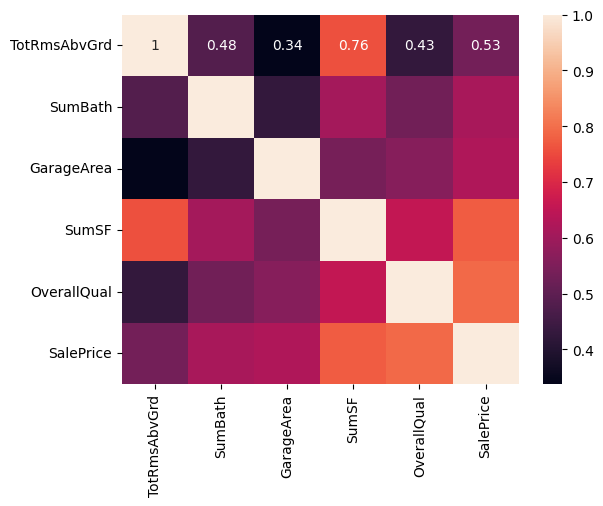

In [31]:
sns.heatmap(df_train.corr(),annot = True)

In [32]:
corr_matrix = df_train.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
SumSF           0.773909
GarageArea      0.623431
SumBath         0.613005
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

# test dataset

In [33]:
df_test = pd.read_csv(r"C:\Users\elkha\Downloads\house\test.csv")

In [34]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [35]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [36]:
test_req=["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd"]

In [37]:
select_test=df_test[test_req]

In [38]:
select_test.loc[:, 'SumBath'] = (select_test['BsmtFullBath'].fillna(0) + select_test['BsmtHalfBath'].fillna(0) + select_test['FullBath'].fillna(0) + select_test['HalfBath'].fillna(0))

select_test.loc[:, 'SumSF'] = (select_test['TotalBsmtSF'].fillna(0) + select_test['1stFlrSF'].fillna(0) + select_test['2ndFlrSF'].fillna(0) + select_test['LowQualFinSF'].fillna(0) + select_test['GrLivArea'].fillna(0))

C:\Users\elkha\AppData\Local\Temp\ipykernel_16288\3641030425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_test.loc[:, 'SumBath'] = (select_test['BsmtFullBath'].fillna(0) + select_test['BsmtHalfBath'].fillna(0) + select_test['FullBath'].fillna(0) + select_test['HalfBath'].fillna(0))
C:\Users\elkha\AppData\Local\Temp\ipykernel_16288\3641030425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_test.loc[:, 'SumSF'] = (select_test['TotalBsmtSF'].fillna(0) + select_test['1stFlrSF'].fillna(0

In [39]:
select_test

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,SumBath,SumSF
0,730.0,5,882.0,896,0,0,896,0.0,0.0,1,0,5,1.0,2674.0
1,312.0,6,1329.0,1329,0,0,1329,0.0,0.0,1,1,6,2.0,3987.0
2,482.0,5,928.0,928,701,0,1629,0.0,0.0,2,1,6,3.0,4186.0
3,470.0,6,926.0,926,678,0,1604,0.0,0.0,2,1,7,3.0,4134.0
4,506.0,8,1280.0,1280,0,0,1280,0.0,0.0,2,0,5,2.0,3840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,5,2.0,2730.0
1455,286.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,6,2.0,2730.0
1456,576.0,5,1224.0,1224,0,0,1224,1.0,0.0,1,0,7,2.0,3672.0
1457,0.0,5,912.0,970,0,0,970,0.0,1.0,1,0,6,2.0,2852.0


In [40]:
df_test = select_test[['TotRmsAbvGrd','SumBath','GarageArea','SumSF','OverallQual']]

In [41]:
df_test

,TotRmsAbvGrd,SumBath,GarageArea,SumSF,OverallQual
0,5,1.0,730.0,2674.0,5
1,6,2.0,312.0,3987.0,6
2,6,3.0,482.0,4186.0,5
3,7,3.0,470.0,4134.0,6
4,5,2.0,506.0,3840.0,8
...,...,...,...,...,...
1454,5,2.0,0.0,2730.0,4
1455,6,2.0,286.0,2730.0,4
1456,7,2.0,576.0,3672.0,5
1457,6,2.0,0.0,2852.0,5


In [42]:
df_test=df_test.fillna(df_test.mean())

In [43]:
X_test = pipeline.transform(df_test[['TotRmsAbvGrd','SumBath','GarageArea','SumSF','OverallQual']])

In [44]:
X_test.shape

(1459, 5)

In [45]:
model = LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

In [46]:
y_train_pred = model.predict(X_train)

In [47]:
train_mse = mean_squared_error(Y_train,y_train_pred)

In [48]:
train_rmse = np.sqrt(train_mse)

In [49]:
print(f"Training MSE: {train_mse:.2f}, Training RMSE: {train_rmse:.2f}")

Training MSE: 1460715662.52, Training RMSE: 38219.31
